In [39]:
# codigo 1
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
# codigo 2
# Carga el archivo CSV en un DataFrame de Pandas
df = pd.read_csv('AccidentesAviones.csv')

# Elimina las filas con valores nulos o desconocidos en las columnas de interés
df.dropna(subset=['fecha', 'HORA declarada', 'Ruta', 'OperadOR'], inplace=True)

# Convierte la columna 'HORA declarada' al formato de hora adecuado
df['Hora'] = pd.to_datetime(df['HORA declarada'], format='%H%M', errors='coerce').dt.time

# Convierte la columna 'fecha' en un objeto de fecha
df['Fecha'] = pd.to_datetime(df['fecha'], format='%B %d, %Y', errors='coerce')

# Filtra las filas con fechas válidas
df = df[df['Fecha'].notna()]

# Filtra las filas con años diferentes de 1900
df = df[df['Fecha'].dt.year != 1900]

#Crear columna 'Año' a partir de la columna 'Fecha'
df['Año'] = df['Fecha'].dt.year 

#Crear columna 'Hora' a partir de la columna 'HORA declarada'
df['Hora'] = pd.to_datetime(df['HORA declarada'], format='%H%M', errors='coerce').dt.time

#Crear columna 'Ruta' a partir de las columnas 'Ruta' y 'route'
df['Ruta'] = df['Ruta'].fillna('') + df['route'].fillna('')

#Crear columna 'Operador' a partir de las columnas 'OperadOR' y 'flight_no'
df['Operador'] = df['OperadOR'].fillna('') + df['flight_no'].fillna('')

In [41]:
# Reemplaza el símbolo "?" por "null" en todo el DataFrame
df.replace('?', 'null', inplace=True)

df['Ruta'] = df['Ruta'].apply(limpiar_ruta)



In [42]:
# Código 3: Crear la columna 'Año' a partir de la columna 'Fecha'
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df['Año'] = df['Fecha'].dt.year

# Código 4: Crear la columna 'Hora' a partir de la columna 'HORA declarada'
df['Hora'] = pd.to_datetime(df['HORA declarada'], format='%H%M', errors='coerce').dt.time

# Código 5: Crear la columna 'Ruta' a partir de las columnas 'Ruta' y 'route'
df['Ruta'] = df['Ruta'].fillna('') + df['route'].fillna('')

# Código 6: Crear la columna 'Operador' a partir de las columnas 'OperadOR' y 'flight_no'
df['Operador'] = df['OperadOR'].fillna('') + df['flight_no'].fillna('')

# Puedes continuar con otros códigos o transformaciones si es necesario


In [43]:
# codigo 7
# Convierte las columnas numéricas al tipo de dato adecuado
df['PASAJEROS A BORDO'] = pd.to_numeric(df['PASAJEROS A BORDO'], errors='coerce')
df['cantidad de fallecidos'] = pd.to_numeric(df['cantidad de fallecidos'], errors='coerce')
df['ground'] = pd.to_numeric(df['ground'], errors='coerce')
df['all_aboard'] = pd.to_numeric(df['all_aboard'], errors='coerce')
df['crew_aboard'] = pd.to_numeric(df['crew_aboard'], errors='coerce')
df['passenger_fatalities'] = pd.to_numeric(df['passenger_fatalities'], errors='coerce')
df['crew_fatalities'] = pd.to_numeric(df['crew_fatalities'], errors='coerce')


In [44]:
# codigo 8
# Muestra las primeras filas del DataFrame
print(f"Primeras filas del DataFrame:\n{df.head()}")

# Muestra información general sobre el DataFrame
print(f"Información general sobre el DataFrame:\n{df.info()}")

# Muestra estadísticas descriptivas básicas
print(f"Estadísticas descriptivas básicas:\n{df.describe()}")


Primeras filas del DataFrame:
   Unnamed: 0               fecha HORA declarada  \
0           0  September 17, 1908           1718   
1           1  September 07, 1909           null   
2           2       July 12, 1912           0630   
3           3     August 06, 1913           null   
4           4  September 09, 1913           1830   

                                             Ruta                OperadOR  \
0    Fort Myer VirginiaDemonstrationDemonstration    Military - U.S. Army   
1          Juvisy-sur-Orge FranceAir showAir show                    null   
2  Atlantic City New JerseyTest flightTest flight    Military - U.S. Navy   
3            Victoria British Columbia Canadanull                 Private   
4                          Over the North Seanull  Military - German Navy   

  flight_no          route                 ac_type registration cn_ln  ...  \
0      null  Demonstration        Wright Flyer III         null     1  ...   
1      null       Air show          Wr

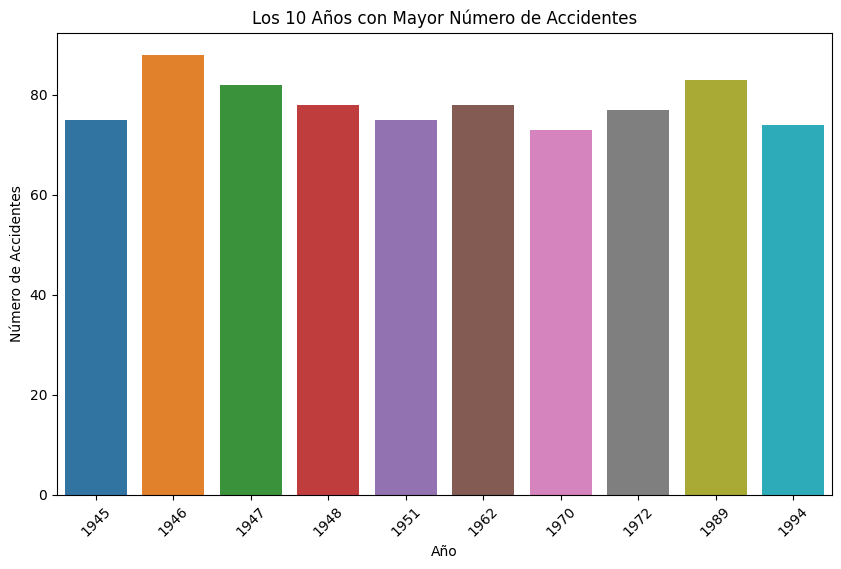

In [45]:
# codigo 9
# Convierte la columna 'Fecha' en un objeto de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Cuenta las ocurrencias de accidentes por año
año_counts = df['Fecha'].dt.year.value_counts()

# Ordena los años por cantidad de accidentes y selecciona los 10 años más concurridos
top_años = año_counts.sort_values(ascending=False).head(10)

# Crea un gráfico de barras de los 10 años con mayor número de accidentes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_años.index, y=top_años.values)
plt.title('Los 10 Años con Mayor Número de Accidentes')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)

# Guarda la gráfica como imagen
plt.savefig('Top_Años_Accidentes.png')

# Muestra la gráfica
plt.show()


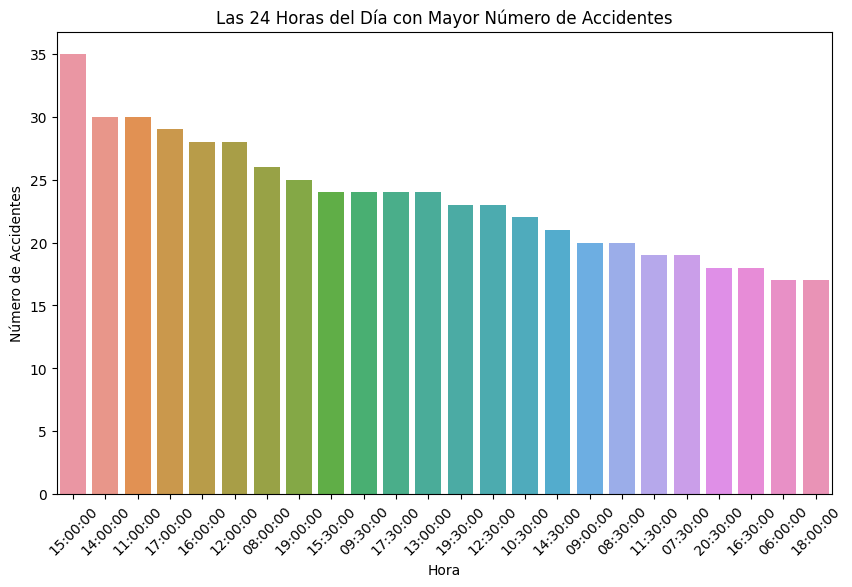

In [46]:
# codigo 10
# Cuenta las ocurrencias de cada hora
hora_counts = df['Hora'].value_counts()

# Selecciona las 24 horas más comunes
top_horas = hora_counts.head(24)

# Crea un gráfico de barras de las 24 horas con mayor número de accidentes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_horas.index, y=top_horas.values)
plt.title('Las 24 Horas del Día con Mayor Número de Accidentes')
plt.xlabel('Hora')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)

# Guarda la gráfica como imagen
plt.savefig('Top_Horas_Accidentes.png')

# Muestra la gráfica
plt.show()


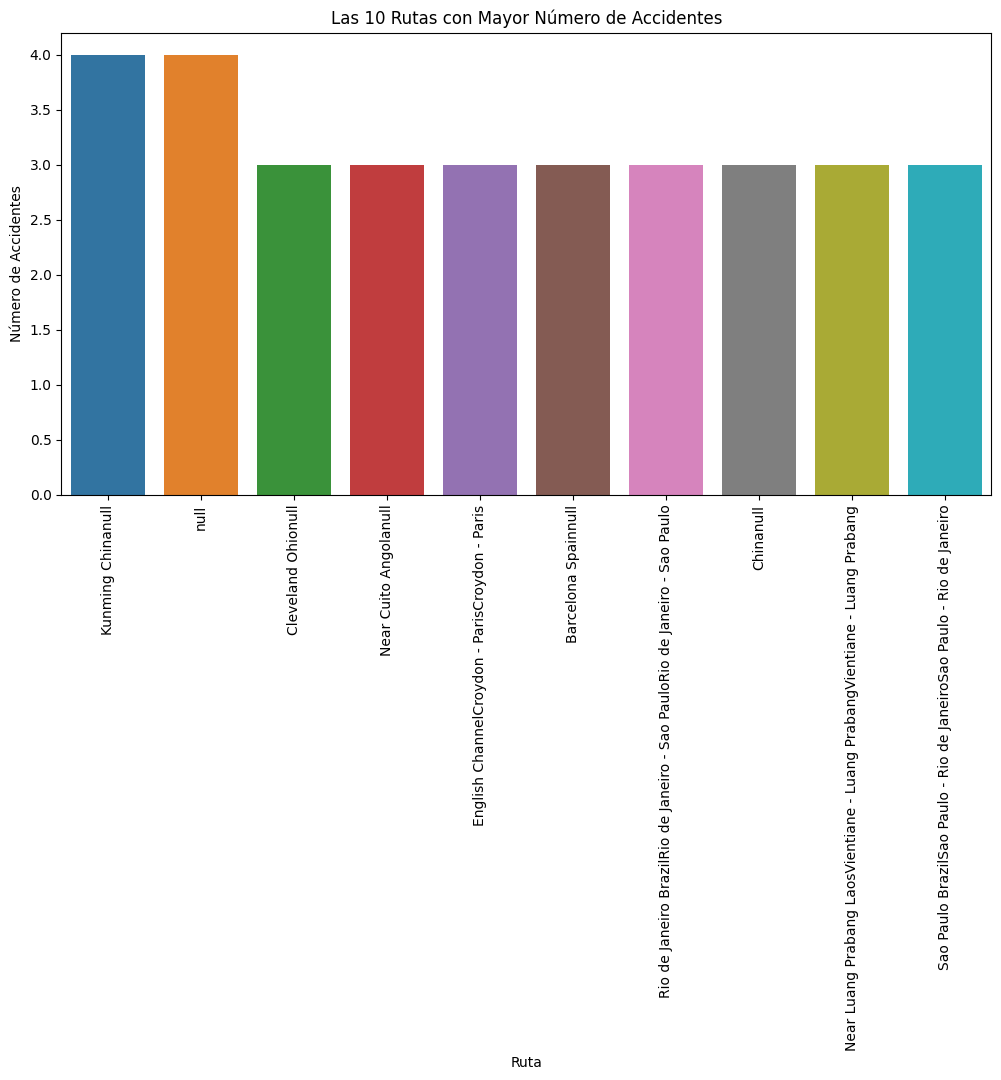

In [47]:
#c codigo 11
# Cálculo de ruta_counts
ruta_counts = df['Ruta'].value_counts()

# Selecciona las 10 rutas más comunes
top_rutas = ruta_counts.head(10)

# Crea un gráfico de barras de las 10 rutas con mayor número de accidentes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rutas.index, y=top_rutas.values)
plt.title('Las 10 Rutas con Mayor Número de Accidentes')
plt.xlabel('Ruta')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=90)

# Guarda la gráfica como imagen
plt.savefig('Top_Rutas_Accidentes.png')

# Muestra la gráfica
plt.show()


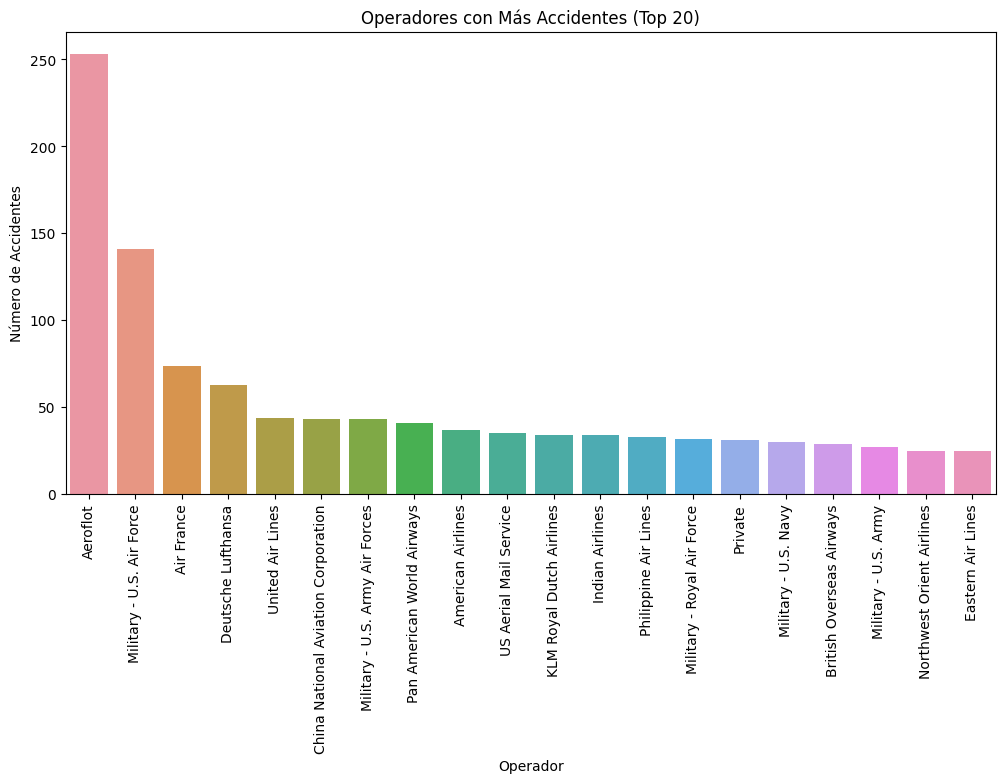

In [48]:
# codigo 12
# Cuenta las ocurrencias de cada operador
operador_counts = df['OperadOR'].value_counts()

# Selecciona los 20 operadores con más accidentes
top_operadores = operador_counts.head(20)

# Crea un gráfico de barras para visualizar los 20 operadores con más accidentes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_operadores.index, y=top_operadores.values)
plt.title('Operadores con Más Accidentes (Top 20)')
plt.xlabel('Operador')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=90)

# Guarda la gráfica como imagen
plt.savefig('Top_Operadores_Accidentes.png')

# Muestra la gráfica
plt.show()


/var/folders/q1/58gkg1056zl5yypp4l5g7fxw0000gn/T/ipykernel_697/488454514.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top_aerolineas, x='OperadOR', y='cantidad de fallecidos', estimator=sum, ci=None)


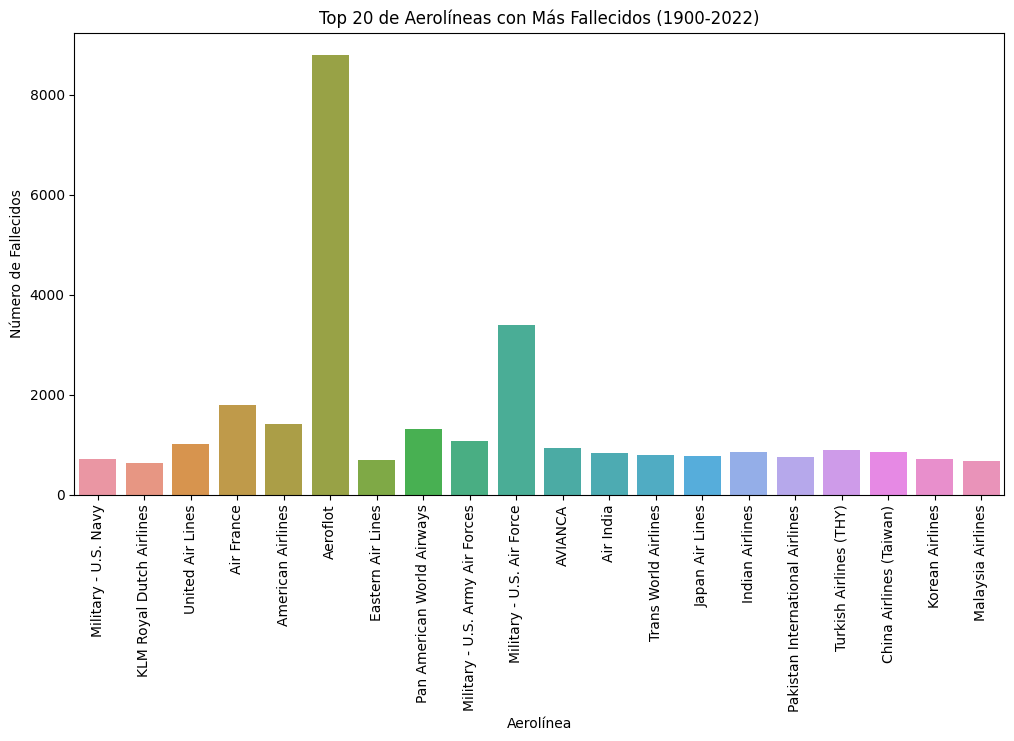

In [49]:
# codigo 13
# Convierte la columna 'Fecha' en un objeto de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Asegúrate de que la columna 'cantidad de fallecidos' sea numérica
df['cantidad de fallecidos'] = pd.to_numeric(df['cantidad de fallecidos'], errors='coerce')

# Filtra los datos para incluir solo los años entre 1900 y 2022
df = df[(df['Fecha'].dt.year >= 1900) & (df['Fecha'].dt.year <= 2022)]

# Calcula el total de fallecidos por aerolínea
total_fallecidos_por_aerolinea = df.groupby('OperadOR')['cantidad de fallecidos'].sum()

# Ordena las aerolíneas por la cantidad total de fallecidos de mayor a menor
top_aerolineas = total_fallecidos_por_aerolinea.nlargest(20)

# Filtra el DataFrame original para incluir solo las filas de las top 20 aerolíneas
df_top_aerolineas = df[df['OperadOR'].isin(top_aerolineas.index)]

# Crea un gráfico de barras apiladas
plt.figure(figsize=(12, 6))
sns.set_palette("husl")  # Paleta de colores
sns.barplot(data=df_top_aerolineas, x='OperadOR', y='cantidad de fallecidos', estimator=sum, ci=None)
plt.title('Top 20 de Aerolíneas con Más Fallecidos (1900-2022)')
plt.xlabel('Aerolínea')
plt.ylabel('Número de Fallecidos')
plt.xticks(rotation=90)

# Guarda la gráfica como imagen
plt.savefig('Top_Aerolineas_Fallecidos.png')

# Muestra la gráfica
plt.show()


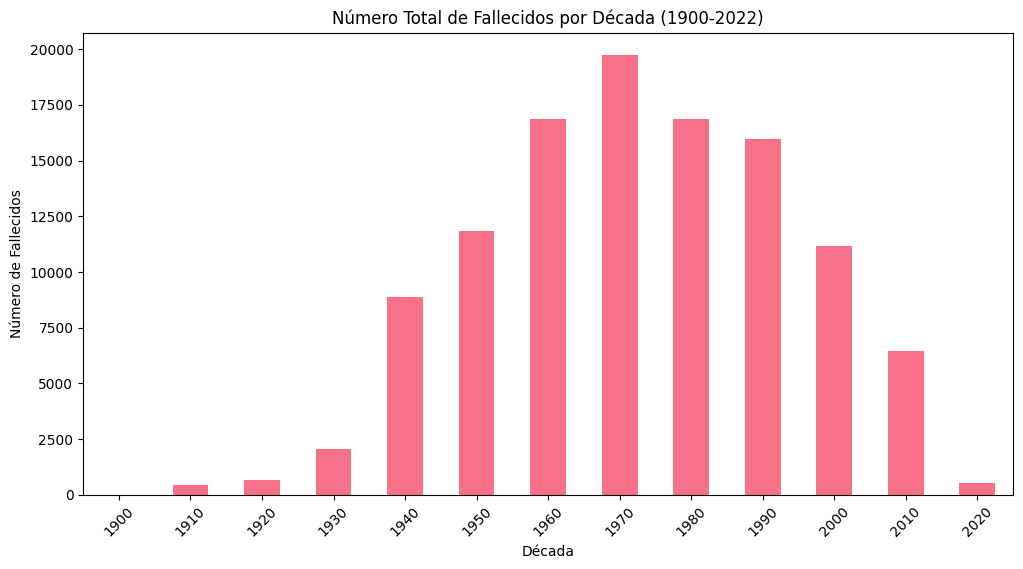

In [50]:
# codigo 14
# Convierte la columna 'Fecha' en un objeto de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Asegúrate de que la columna 'cantidad de fallecidos' sea numérica
df['cantidad de fallecidos'] = pd.to_numeric(df['cantidad de fallecidos'], errors='coerce')

# Filtra los datos para incluir solo los años entre 1900 y 2022
df = df[(df['Fecha'].dt.year >= 1900) & (df['Fecha'].dt.year <= 2022)]

# Agrupa los datos por década y calcula la suma de fallecidos por década
df['Década'] = df['Fecha'].dt.year // 10 * 10
fallecidos_por_década = df.groupby('Década')['cantidad de fallecidos'].sum()

# Crea un gráfico de barras para mostrar el número total de fallecidos por década
plt.figure(figsize=(12, 6))
fallecidos_por_década.plot(kind='bar')
plt.title('Número Total de Fallecidos por Década (1900-2022)')
plt.xlabel('Década')
plt.ylabel('Número de Fallecidos')
plt.xticks(rotation=45)

# Guarda la gráfica como imagen
plt.savefig('Total_Fallecidos_Por_Decada.png')

# Muestra la gráfica
plt.show()



<Figure size 640x480 with 0 Axes>

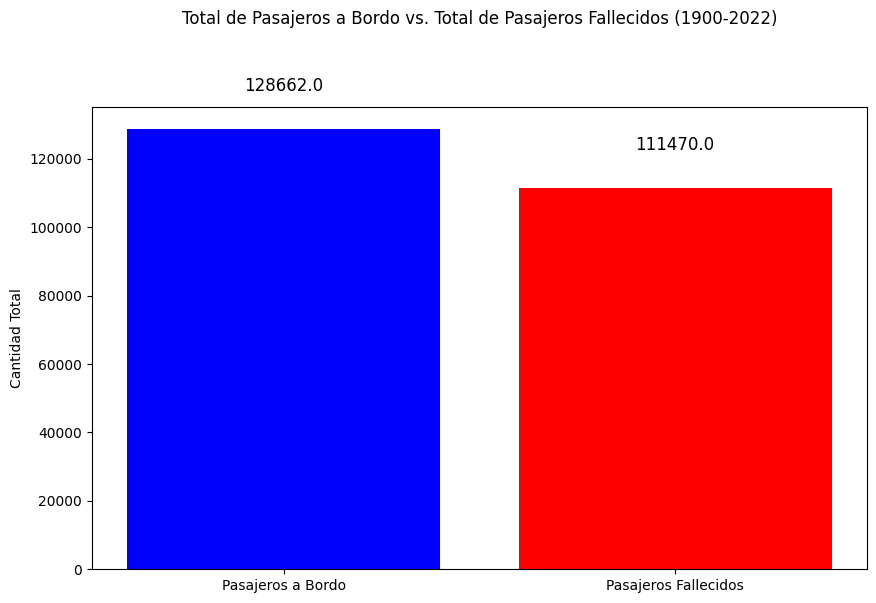

In [51]:
# codigo 15

# Convierte la columna 'Fecha' en un objeto de fecha y maneja fechas incorrectas como valores nulos
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Asegúrate de que las columnas 'PASAJEROS A BORDO' y 'cantidad de fallecidos' sean numéricas
df['PASAJEROS A BORDO'] = pd.to_numeric(df['PASAJEROS A BORDO'], errors='coerce')
df['cantidad de fallecidos'] = pd.to_numeric(df['cantidad de fallecidos'], errors='coerce')

# Filtra los datos para incluir solo los años entre 1900 y 2022
df = df[(df['Fecha'].dt.year >= 1900) & (df['Fecha'].dt.year <= 2022)]

# Calcula el número total de pasajeros a bordo y el número total de pasajeros fallecidos
total_pasajeros_abordo = df['PASAJEROS A BORDO'].sum()
total_pasajeros_fallecidos = df['cantidad de fallecidos'].sum()

# Ajusta los márgenes de la figura para aumentar el espacio superior
plt.subplots_adjust(top=0.95)

# Crea un gráfico de barras para mostrar ambos totales con números encima de las barras
plt.figure(figsize=(10, 6))
plt.bar(['Pasajeros a Bordo', 'Pasajeros Fallecidos'], [total_pasajeros_abordo, total_pasajeros_fallecidos], color=['blue', 'red'])
plt.title('Total de Pasajeros a Bordo vs. Total de Pasajeros Fallecidos (1900-2022)', pad=60)  # Aumenta el espacio entre el título y las barras
plt.ylabel('Cantidad Total')

# Agrega los números encima de las barras
for i, v in enumerate([total_pasajeros_abordo, total_pasajeros_fallecidos]):
    plt.text(i, v + 10000, str(v), ha='center', va='bottom', fontsize=12)

# Guarda la gráfica como imagen
plt.savefig('Total_Pasajeros_A_Bordo_vs_Fallecidos.png')

# Muestra la gráfica
plt.show()


In [52]:
#Convertir las columnas numéricas al tipo de dato adecuado
columnas_numericas = ['PASAJEROS A BORDO', 'cantidad de fallecidos', 'ground', 'all_aboard', 'crew_aboard', 'passenger_fatalities', 'crew_fatalities']
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

In [59]:
# Muestra la lista de columnas en el DataFrame
print("Columnas del DataFrame:")
print(df.columns)

# Muestra el 10% de los datos
sample_data = df.sample(frac=0.1, random_state=1)  # Puedes ajustar el valor de 'frac' para cambiar el porcentaje de datos a mostrar
print("Muestra del 10% de los datos:")
print(sample_data)


Columnas del DataFrame:
Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary', 'Hora',
       'Fecha', 'Año', 'Operador', 'Década'],
      dtype='object')
Muestra del 10% de los datos:
      Unnamed: 0              fecha HORA declarada  \
4004        4004   January 08, 1996           1243   
1739        1739  December 26, 1958           1252   
2471        2471     March 16, 1970           1130   
1669        1669  December 18, 1957           1235   
1521        1521       May 21, 1955           null   
...          ...                ...            ...   
4127        4127   January 13, 1998           1830   
2461        2461  February 04, 1970           1345   
3411        3411  November 25, 1986           null   
3329        3329     April 20, 1985        

In [58]:
#Crear columna 'Década' a partir de la columna 'Fecha'
df['Década'] = df['Fecha'].dt.year // 10 * 10

In [57]:
#Guardar el DataFrame limpio en un nuevo archivo CSV
df.to_csv('AccidentesAviones_Limpio.csv', index=False)

In [56]:
print(df.columns)


Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary', 'Hora',
       'Fecha', 'Año', 'Operador', 'Década'],
      dtype='object')


imprimir ground y ver si lo podemos mexclar conla tabal de fallecidos ya que este s esupone que son fallecidos en tierra por los accidentes 

indicar a la IA que debe crear las columas necesarias para arrastrar y soltar en power  bi y no nos ocleque a crear colunas en power bi, que cree todo para solo soltar y pegar en cada J que no se olvide de ninguna coluna necesaria incluyendo Recuento de Accidentes por Año para el grafico: Los 10 Años con Mayor Número de Accidentes y de igual manera todo lo necesario para los otros graficos teneindo en cuenta que etsos graficos deben de ser interactivos  